In [3]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Data Collection and Loading
Steps:
### - Download the dataset from Kaggle Intel Image Classification.
### - Unzip the dataset and structure folders if needed.
### - Load images into NumPy arrays using OpenCV.

In [5]:
# Define the dataset paths
dataset_path = "C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/Laabza/Baacumen/M-7 Deep Learning(1)/Data"
dataset_path_train = os.path.join(dataset_path, "seg_train")
dataset_path_test = os.path.join(dataset_path, "seg_test")
dataset_path_pred = os.path.join(dataset_path, "seg_pred")

# Load and preprocess images function
def load_images(folder_path, img_size=(150, 150)):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))  # Sorted for consistent label ordering
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):  # Skip if not a directory
            continue
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and validation images
train_images, train_labels = load_images(dataset_path_train)
val_images, val_labels = load_images(dataset_path_test)

# Check data shapes to ensure proper loading
print(f"Training Data: {train_images.shape}, Training Labels: {train_labels.shape}")
print(f"Validation Data: {val_images.shape}, Validation Labels: {val_labels.shape}")


Training Data: (14034, 150, 150, 3), Training Labels: (14034,)
Validation Data: (3000, 150, 150, 3), Validation Labels: (3000,)


# 3. Data Preprocessing
Steps:
### - Resize all images to 150x150.
### - Normalize pixel values to [0, 1].
### - Augment data using rotation, flipping, zooming, etc.

In [7]:
# Normalize data
train_images = train_images / 255.0
val_images = val_images / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)


# 4. Building the CNN Model
Steps:
### - Design a CNN with TensorFlow/Keras.
### - Use layers like Conv2D, MaxPooling2D, Dense, Dropout.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(150, 150, 3)),  # Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Model Training and Evaluation
Steps:
### - Train the model using fit with training and validation data.
### - Visualize metrics using Matplotlib.

C:\Users\T.Bizuye\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 266s 595ms/step - accuracy: 0.4568 - loss: 1.4457 - val_accuracy: 0.6550 - val_loss: 0.9020
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 233s 530ms/step - accuracy: 0.6073 - loss: 1.0295 - val_accuracy: 0.6960 - val_loss: 0.8613
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 229s 522ms/step - accuracy: 0.6367 - loss: 0.9662 - val_accuracy: 0.7160 - val_loss: 0.8049
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 229s 522ms/step - accuracy: 0.6683 - loss: 0.8839 - val_accuracy: 0.7237 - val_loss: 0.7536
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 235s 534ms/step - accuracy: 0.6963 - loss: 0.8375 - val_accuracy: 0.7370 - val_loss: 0.7370
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 231s 525ms/step - accuracy: 0.7071 - loss: 0.8117 - val_accuracy: 0.7943 - val_loss: 0.5904
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 237s 539ms/step - accuracy: 0.7179 - loss: 0.7813 - val_accuracy: 0.7737 - val_loss: 0.6509
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 227s 517ms/step - accuracy: 0.7367 -

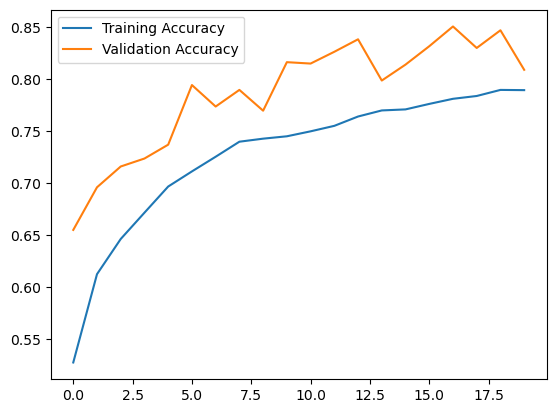

In [11]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(val_images, val_labels),
                    epochs=20)

# Plot metrics
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# 6. Model Optimization
Steps:
### - Add Dropout, Batch Normalization, and Learning Rate Scheduling to improve performance.
### - Fine-tune hyperparameters like the number of layers, learning rate, etc.

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          validation_data=(val_images, val_labels),
          epochs=20,
          callbacks=[lr_scheduler])


C:\Users\T.Bizuye\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 262s 594ms/step - accuracy: 0.7949 - loss: 0.5826 - val_accuracy: 0.8427 - val_loss: 0.4623 - learning_rate: 0.0010
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 236s 537ms/step - accuracy: 0.7873 - loss: 0.5870 - val_accuracy: 0.8483 - val_loss: 0.4686 - learning_rate: 0.0010
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 222s 505ms/step - accuracy: 0.7935 - loss: 0.5848 - val_accuracy: 0.8280 - val_loss: 0.5122 - learning_rate: 0.0010
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 237s 540ms/step - accuracy: 0.7984 - loss: 0.5814 - val_accuracy: 0.8393 - val_loss: 0.4787 - learning_rate: 0.0010
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 228s 518ms/step - accuracy: 0.7991 - loss: 0.5701 - val_accuracy: 0.8557 - val_loss: 0.4214 - learning_rate: 0.0010
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 237s 541ms/step - accuracy: 0.7977 - loss: 0.5763 - val_accuracy: 0.8510 - val_loss: 0.4355 - learning_rate: 0.0010
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 227s 516ms/step - accura

# 7. Model Deployment
Steps:
### Save the trained model

In [35]:
model.save("image_classifier.keras")

# Streamlit App

In [37]:
import streamlit as st
from tensorflow.keras.models import load_model

model = load_model("image_classifier.keras")

def predict_image(image):
    img = cv2.resize(image, (150, 150)) / 255.0
    img = img[np.newaxis, ...]
    predictions = model.predict(img)
    return predictions.argmax()

st.title("Image Classification App")
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png"])
if uploaded_file:
    image = cv2.imread(uploaded_file)
    st.image(image)
    class_idx = predict_image(image)
    st.write(f"Predicted Class: {class_idx}")
